<a href="https://colab.research.google.com/github/KrishnenduGhorui/ML-Project-code/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_heart=pd.read_csv('/content/heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145.0,233.0,1,0,150.0,No,2.3,0,0,1,1
1,37,Male,2,130.0,250.0,0,1,187.0,No,3.5,0,0,2,1
2,41,Female,1,130.0,204.0,0,0,172.0,No,1.4,2,0,2,1
3,56,Male,1,120.0,236.0,0,1,178.0,No,0.8,2,0,2,1
4,57,Female,0,120.0,354.0,0,1,163.0,Yes,0.6,2,0,2,1


In [ ]:
# verifying percentage of missing value in feature ,feature containing very high missing to be droped 
df_heart.isnull().mean()*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    1.650165
chol        2.310231
fbs         0.000000
restecg     0.000000
thalach     1.980198
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
target      0.000000
dtype: float64

In [5]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
df_heart[['trestbps','chol','thalach']]=si.fit_transform(df_heart[['trestbps','chol','thalach']])
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df_heart.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.718121,246.956081,0.148515,0.528053,149.962963,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.497239,51.088367,0.356198,0.525860,22.535079,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,212.000000,0.000000,0.000000,137.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,243.000000,0.000000,1.000000,152.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df_heart.info()     # Observing two object typed fetaure present, so those are categorical, that to be encoded 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


**Encoding** 

In [6]:
# Perform OneHotEncoding on Age feature
df_heart['sex']=pd.get_dummies(df_heart['sex'],drop_first=True)
# Perform mapping on exang feature , No to 0 and yes to 1
df_heart['exang']=df_heart['exang'].map({'No':0,'Yes':1})
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.000000,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.000000,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.000000,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.000000,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.000000,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,149.962963,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.000000,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.000000,0,3.4,1,2,3,0
301,57,1,0,130.0,131.0,0,1,115.000000,1,1.2,1,1,3,0


**Visualisation of data**

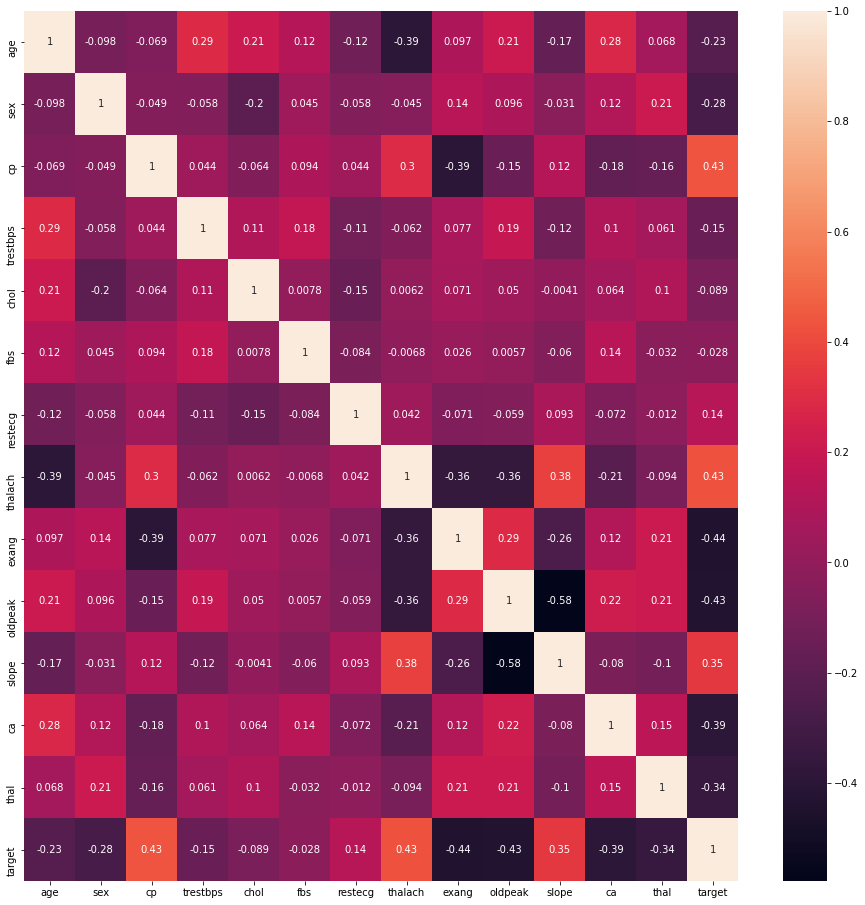

In [ ]:
# Visualising correlation through Heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df_heart.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1087a46a0>,
      dtype=object)

<Figure size 1152x1152 with 0 Axes>

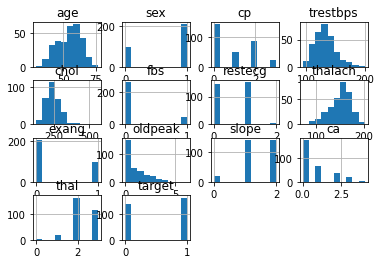

In [ ]:
plt.figure(figsize=(16,16))
df_heart.hist()

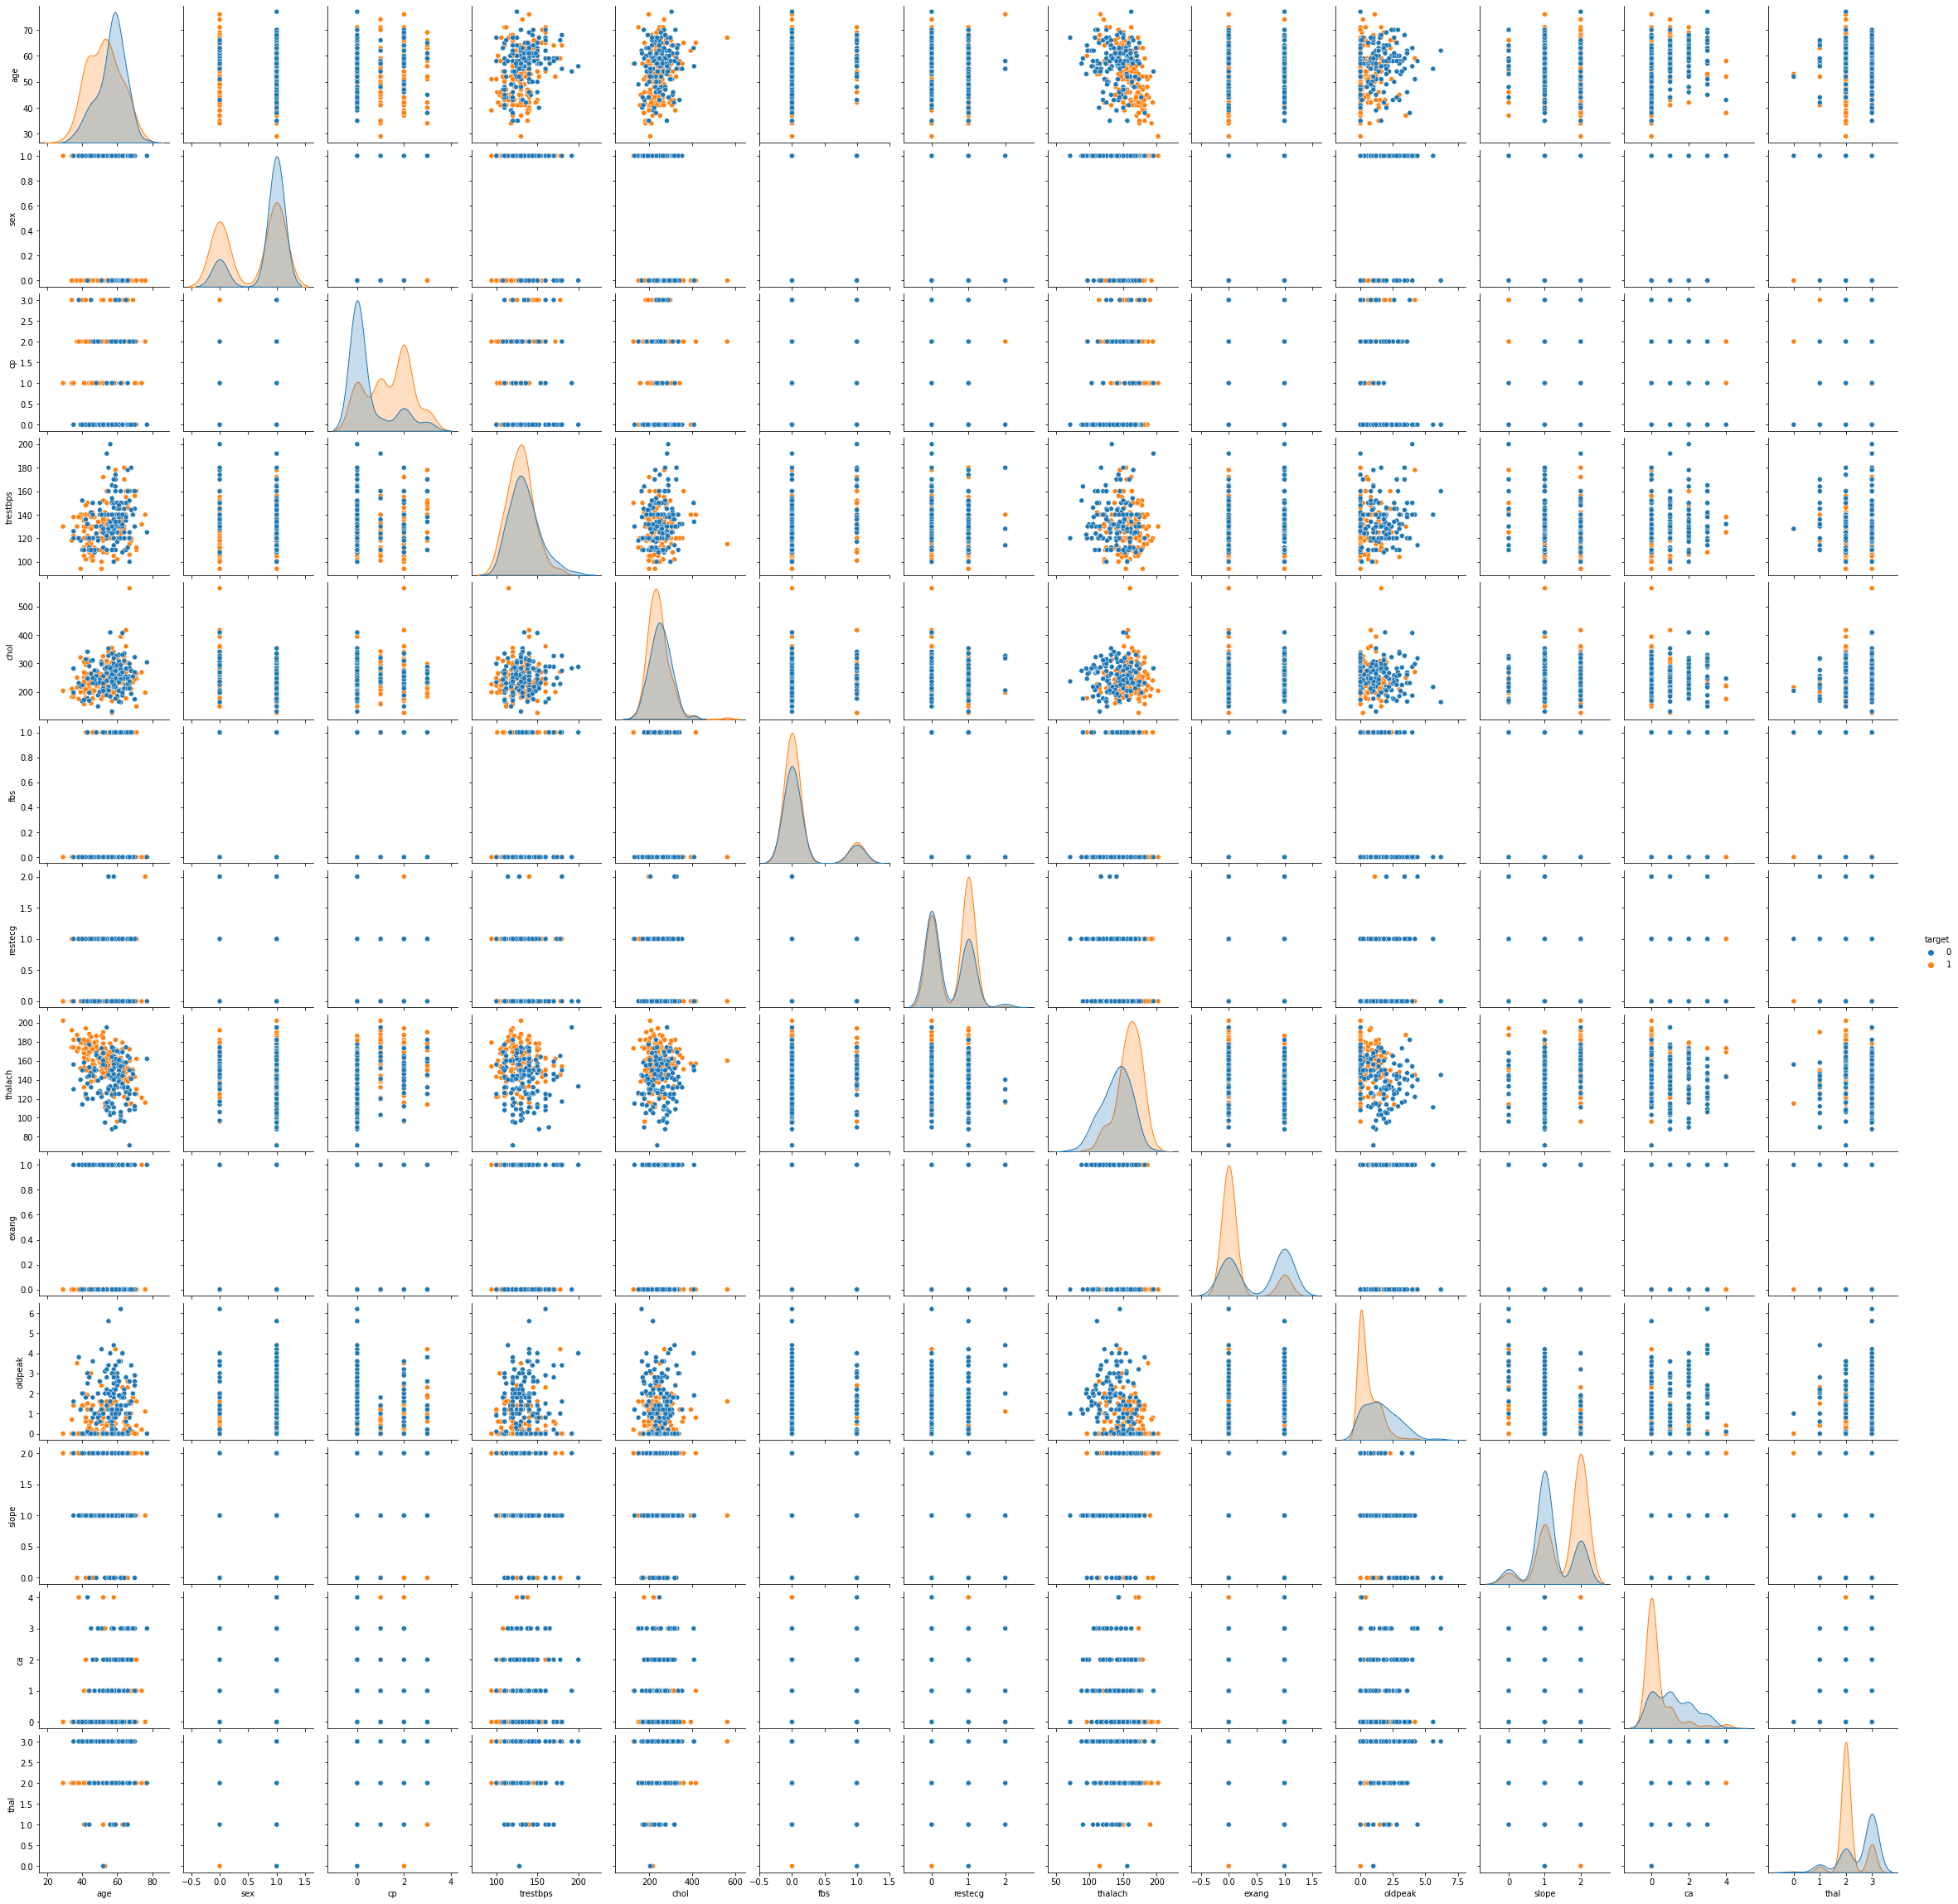

In [ ]:
# Visualising mutual relation between each feature 
sns.pairplot(df_heart,hue='target')

**Outlier detection and removal**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


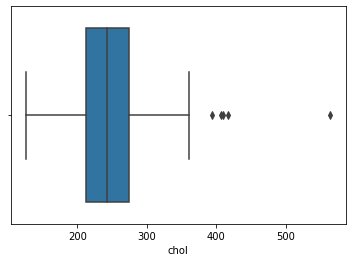

In [ ]:
sns.boxplot(df_heart['chol'])

In [7]:
q1_chol=np.quantile(df_heart['chol'],.25)
q3_chol=np.quantile(df_heart['chol'],.75)
IQR_chol=q3_chol-q1_chol
ul_chol=q3_chol+1.5*IQR_chol
df_heart=df_heart[df_heart['chol']<=ul_chol]
df_heart.shape

(298, 14)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


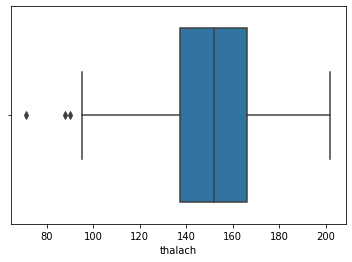

In [ ]:
sns.boxplot(df_heart['thalach'])

In [8]:
q1_thal=np.quantile(df_heart['thalach'],.25)
q3_thal=np.quantile(df_heart['thalach'],.75)
IQR_thal=q3_thal-q1_thal
ll_thal=q1_thal-1.5*IQR_thal
df_heart=df_heart[df_heart['thalach']>=ll_thal]
df_heart.shape

(295, 14)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


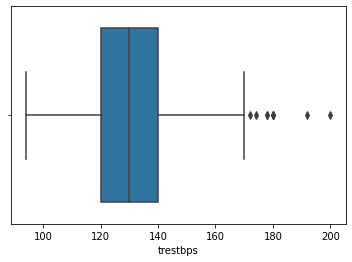

In [ ]:
sns.boxplot(df_heart['trestbps'])

In [9]:
q1_tbps=np.quantile(df_heart['trestbps'],.25)
q3_tbps=np.quantile(df_heart['trestbps'],.75)
IQR_tbps=q3_tbps-q1_tbps
ul_tbps=q3_tbps+1.5*IQR_tbps
df_heart=df_heart[df_heart['trestbps']<=ul_tbps]
df_heart.shape

(286, 14)

1    159
0    127
Name: target, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


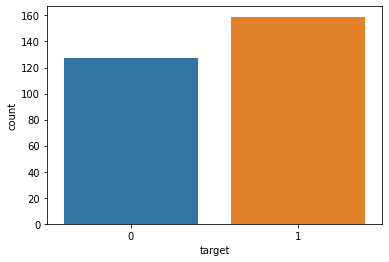

In [ ]:
# Checking whole data balanced or imbalanced 
targetValCount=df_heart['target'].value_counts()
print(targetValCount)
sns.countplot(df_heart['target'])

In [10]:
x=df_heart.iloc[:,:-1]
y=df_heart.iloc[:,-1]
print('x \n',x)
print('y \n',y)

x 
      age  sex  cp  trestbps   chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3     145.0  233.0  ...      0      2.3      0   0     1
1     37    1   2     130.0  250.0  ...      0      3.5      0   0     2
2     41    0   1     130.0  204.0  ...      0      1.4      2   0     2
3     56    1   1     120.0  236.0  ...      0      0.8      2   0     2
4     57    0   0     120.0  354.0  ...      1      0.6      2   0     2
..   ...  ...  ..       ...    ...  ...    ...      ...    ...  ..   ...
298   57    0   0     140.0  241.0  ...      1      0.2      1   0     3
299   45    1   3     110.0  264.0  ...      0      1.2      1   0     3
300   68    1   0     144.0  193.0  ...      0      3.4      1   2     3
301   57    1   0     130.0  131.0  ...      1      1.2      1   1     3
302   57    0   1     130.0  236.0  ...      0      0.0      1   1     2

[286 rows x 13 columns]
y 
 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
3

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=1)

In [12]:
# Performing standard scaling to bring some feature in same range 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cols_to_scaled=['age','trestbps','chol','thalach','oldpeak']
x_train[cols_to_scaled]=sc.fit_transform(x_train[cols_to_scaled])
x_test[cols_to_scaled]=sc.transform(x_test[cols_to_scaled])
print(x_train)
print(x_test)

          age  sex  cp  trestbps      chol  ...  exang   oldpeak  slope  ca  thal
41  -0.655598    1   1 -0.037590  0.067309  ...      0 -0.694588      1   0     2
164 -1.782870    1   2  0.481234 -1.545265  ...      0 -0.869675      2   4     2
40  -0.317416    0   2  0.073835  1.518626  ...      0  0.443477      2   1     2
111  0.358947    1   2  1.259471 -2.674067  ...      0 -0.694588      2   1     3
302  0.358947    0   1 -0.037590 -0.140022  ...      0 -0.869675      1   1     2
..        ...  ...  ..       ...       ...  ...    ...       ...    ...  ..   ...
210  0.358947    1   2 -0.167297 -0.301279  ...      0 -0.519501      1   1     3
270 -0.881052    1   0 -0.686121  0.159456  ...      0 -0.169328      2   0     3
74  -1.219234    0   2 -0.556415 -0.669867  ...      0 -0.694588      1   0     2
247  1.373492    1   1  1.908002  0.090346  ...      1 -0.869675      1   3     1
39   1.260765    0   2  1.908002  2.716539  ...      0 -0.169328      2   0     2

[228 rows x 13 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

ML model creation, training, evaluation

In [13]:
from sklearn.svm import SVC
svc=SVC()

In [14]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,0.8,0.6,0.5,0.3,0.1,1.5,2,2.5,3,4],'kernel':['linear']},{'C':[1,0.8,0.6,0.5,0.3,0.1,1.5,2,2.5,3,4],'kernel':['rbf'],'gamma':[1,2,3]},{'C':[1,0.8,0.6,0.5,0.3,0.1,1.5,2,2.5,3,4],'kernel':['poly'],'gamma':[1,2,3]}]
GrdSrchCV_svc=GridSearchCV(estimator=svc,param_grid=parameters,cv=7,n_jobs=-1)
GrdSrchCV_svc.fit(x_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 0.8, 0.6, 0.5, 0.3, 0.1, 1.5, 2, 2.5, 3, 4],
                          'kernel': ['linear']},
                         {'C': [1, 0.8, 0.6, 0.5, 0.3, 0.1, 1.5, 2, 2.5, 3, 4],
                          'gamma': [1, 2, 3], 'kernel': ['rbf']},
                         {'C': [1, 0.8, 0.6, 0.5, 0.3, 0.1, 1.5, 2, 2.5, 3, 4],
                          'gamma': [1, 2, 3], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [15]:
bestAccScr_svc=GrdSrchCV_svc.best_score_
bestParams_svc=GrdSrchCV_svc.best_params_
print(bestAccScr_svc)
print(bestParams_svc)

0.8551136363636365
{'C': 0.1, 'kernel': 'linear'}


In [16]:
GrdSrchCVResult_svc=pd.DataFrame(GrdSrchCV_svc.cv_results_)
GrdSrchCVResult_svc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006070,0.000575,0.001735,0.000148,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.787879,0.909091,0.818182,0.878788,0.87500,0.87500,0.68750,0.833063,0.070549,6
1,0.007583,0.003148,0.001833,0.000146,0.8,linear,NaN,"{'C': 0.8, 'kernel': 'linear'}",0.787879,0.909091,0.818182,0.878788,0.87500,0.90625,0.68750,0.837527,0.073967,2
2,0.007091,0.002063,0.002590,0.001624,0.6,linear,NaN,"{'C': 0.6, 'kernel': 'linear'}",0.787879,0.909091,0.818182,0.878788,0.87500,0.90625,0.68750,0.837527,0.073967,2
3,0.006289,0.003222,0.001886,0.000314,0.5,linear,NaN,"{'C': 0.5, 'kernel': 'linear'}",0.787879,0.909091,0.818182,0.878788,0.87500,0.90625,0.68750,0.837527,0.073967,2
4,0.004842,0.000447,0.004962,0.005346,0.3,linear,NaN,"{'C': 0.3, 'kernel': 'linear'}",0.787879,0.909091,0.818182,0.878788,0.84375,0.93750,0.68750,0.837527,0.077648,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.007815,0.000751,0.001895,0.000054,3,poly,2,"{'C': 3, 'gamma': 2, 'kernel': 'poly'}",0.696970,0.787879,0.757576,0.848485,0.71875,0.78125,0.71875,0.758523,0.048440,12
73,0.007969,0.000799,0.002042,0.000181,3,poly,3,"{'C': 3, 'gamma': 3, 'kernel': 'poly'}",0.696970,0.787879,0.757576,0.848485,0.71875,0.78125,0.71875,0.758523,0.048440,12
74,0.007726,0.000956,0.002038,0.000225,4,poly,1,"{'C': 4, 'gamma': 1, 'kernel': 'poly'}",0.696970,0.787879,0.757576,0.848485,0.71875,0.78125,0.71875,0.758523,0.048440,12
75,0.012121,0.005855,0.002040,0.000143,4,poly,2,"{'C': 4, 'gamma': 2, 'kernel': 'poly'}",0.696970,0.787879,0.757576,0.848485,0.71875,0.78125,0.71875,0.758523,0.048440,12


In [17]:
svc_final=SVC(C=0.1,kernel='linear')
svc_final.fit(x_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
from sklearn.metrics import confusion_matrix
AccScore_svc=svc_final.score(x_test,y_test)
y_pred=svc_final.predict(x_test)
cm_svc=confusion_matrix(y_test,y_pred)
print(AccScore_svc)
print(cm_svc)

0.8275862068965517
[[21 10]
 [ 0 27]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knnc=KNeighborsClassifier()

In [20]:
parameters_knnc=[{'n_neighbors':range(4,20)}]
GrdSrchCV_knnc=GridSearchCV(estimator=knnc,param_grid=parameters_knnc,cv=7,n_jobs=-1)
GrdSrchCV_knnc.fit(x_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': range(4, 20)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
bestAccScr_knnc=GrdSrchCV_knnc.best_score_
bestParams_knnc=GrdSrchCV_knnc.best_params_
print(bestAccScr_knnc)
print(bestParams_knnc)

0.8245400432900433
{'n_neighbors': 5}


In [22]:
GrdSrchCVResult_knnc=pd.DataFrame(GrdSrchCV_knnc.cv_results_)
GrdSrchCVResult_knnc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004339,0.001291,0.006507,0.002357,4,{'n_neighbors': 4},0.696970,0.757576,0.848485,0.848485,0.75000,0.84375,0.71875,0.780574,0.060345,14
1,0.003208,0.000124,0.005218,0.001818,5,{'n_neighbors': 5},0.757576,0.818182,0.848485,0.878788,0.81250,0.90625,0.75000,0.824540,0.054009,1
2,0.003301,0.000153,0.005412,0.002230,6,{'n_neighbors': 6},0.666667,0.818182,0.848485,0.848485,0.75000,0.84375,0.78125,0.793831,0.062460,11
3,0.004444,0.002813,0.004577,0.000092,7,{'n_neighbors': 7},0.757576,0.818182,0.848485,0.818182,0.75000,0.90625,0.71875,0.802489,0.059951,7
4,0.003160,0.000115,0.004689,0.000494,8,{'n_neighbors': 8},0.696970,0.818182,0.848485,0.818182,0.75000,0.90625,0.75000,0.798295,0.065352,8
5,0.003171,0.000094,0.005661,0.002217,9,{'n_neighbors': 9},0.757576,0.818182,0.848485,0.757576,0.78125,0.90625,0.75000,0.802760,0.053942,5
6,0.003207,0.000122,0.004916,0.000985,10,{'n_neighbors': 10},0.757576,0.787879,0.848485,0.818182,0.78125,0.90625,0.75000,0.807089,0.051293,3
7,0.003146,0.000089,0.004412,0.000119,11,{'n_neighbors': 11},0.727273,0.818182,0.848485,0.848485,0.81250,0.90625,0.71875,0.811418,0.062628,2
8,0.003166,0.000114,0.004565,0.000080,12,{'n_neighbors': 12},0.727273,0.818182,0.848485,0.818182,0.81250,0.90625,0.71875,0.807089,0.060941,3
9,0.003092,0.000085,0.005074,0.001349,13,{'n_neighbors': 13},0.727273,0.848485,0.818182,0.818182,0.81250,0.90625,0.68750,0.802624,0.067986,6


In [23]:
knnc_final=KNeighborsClassifier(n_neighbors=5)
knnc_final.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
from sklearn.metrics import confusion_matrix
AccScore_knnc=knnc_final.score(x_test,y_test)
y_pred_knnc=knnc_final.predict(x_test)
cm_knnc=confusion_matrix(y_test,y_pred_knnc)
print(AccScore_knnc)
print(cm_knnc)

0.8275862068965517
[[22  9]
 [ 1 26]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [26]:
parameters_rfc=[{'n_estimators':range(10,30),'criterion':['gini','entropy']}]
GrdSrchCV_rfc=GridSearchCV(estimator=rfc,param_grid=parameters_rfc,cv=7,n_jobs=-1)
GrdSrchCV_rfc.fit(x_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [27]:
bestAccScr_rfc=GrdSrchCV_rfc.best_score_
bestParams_rfc=GrdSrchCV_rfc.best_params_
print(bestAccScr_rfc)
print(bestParams_rfc)

0.8331980519480519
{'criterion': 'entropy', 'n_estimators': 23}


In [28]:
GrdSrchCVResult_rfc=pd.DataFrame(GrdSrchCV_rfc.cv_results_)
GrdSrchCVResult_rfc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028431,0.001968,0.004685,0.002028,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.848485,0.757576,0.848485,0.787879,0.81250,0.84375,0.71875,0.802489,0.046716,21
1,0.036031,0.013605,0.004202,0.000318,gini,11,"{'criterion': 'gini', 'n_estimators': 11}",0.727273,0.818182,0.787879,0.757576,0.84375,0.75000,0.75000,0.776380,0.038868,38
2,0.035859,0.005313,0.005417,0.002305,gini,12,"{'criterion': 'gini', 'n_estimators': 12}",0.757576,0.787879,0.818182,0.848485,0.81250,0.87500,0.81250,0.816017,0.035395,10
3,0.035306,0.002950,0.004160,0.000145,gini,13,"{'criterion': 'gini', 'n_estimators': 13}",0.757576,0.818182,0.787879,0.848485,0.87500,0.90625,0.81250,0.829410,0.047274,2
4,0.038136,0.002307,0.004398,0.000210,gini,14,"{'criterion': 'gini', 'n_estimators': 14}",0.757576,0.848485,0.787879,0.878788,0.78125,0.84375,0.75000,0.806818,0.046206,19
5,0.040125,0.002299,0.004749,0.000273,gini,15,"{'criterion': 'gini', 'n_estimators': 15}",0.757576,0.848485,0.818182,0.848485,0.84375,0.87500,0.78125,0.824675,0.038657,7
6,0.042127,0.001833,0.005886,0.002212,gini,16,"{'criterion': 'gini', 'n_estimators': 16}",0.727273,0.848485,0.818182,0.878788,0.84375,0.78125,0.71875,0.802354,0.057329,22
7,0.042818,0.000786,0.004800,0.000215,gini,17,"{'criterion': 'gini', 'n_estimators': 17}",0.787879,0.818182,0.787879,0.818182,0.78125,0.84375,0.75000,0.798160,0.028528,25
8,0.049839,0.005444,0.005223,0.000586,gini,18,"{'criterion': 'gini', 'n_estimators': 18}",0.727273,0.818182,0.757576,0.848485,0.71875,0.81250,0.68750,0.767181,0.055607,40
9,0.049420,0.002835,0.005138,0.000175,gini,19,"{'criterion': 'gini', 'n_estimators': 19}",0.787879,0.818182,0.787879,0.818182,0.75000,0.75000,0.71875,0.775839,0.034785,39


In [29]:
rfc_final=RandomForestClassifier(n_estimators=23,criterion='entropy')
rfc_final.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
AccScore_knnc=rfc_final.score(x_test,y_test)
y_pred_knnc=rfc_final.predict(x_test)
cm_knnc=confusion_matrix(y_test,y_pred_knnc)
print(AccScore_knnc)
print(cm_knnc)

0.8448275862068966
[[23  8]
 [ 1 26]]


In [ ]:
#So, from above , random forest model giving highest accuracy. 